In [2]:
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

In [3]:
con = sqlite3.connect(r"C:\Users\61102\Downloads\archive\switrs.sqlite")
cur = con.cursor()

In [4]:
fatal_fault_collisions = pd.read_sql_query('SELECT * FROM parties JOIN collisions USING (case_id) WHERE at_fault==1 AND killed_victims > 0', con)

In [5]:
fatal_fault_collisions.columns

Index(['id', 'case_id', 'party_number', 'party_type', 'at_fault', 'party_sex',
       'party_age', 'party_sobriety', 'party_drug_physical',
       'direction_of_travel',
       ...
       'bicyclist_injured_count', 'motorcyclist_killed_count',
       'motorcyclist_injured_count', 'primary_ramp', 'secondary_ramp',
       'latitude', 'longitude', 'collision_date', 'collision_time',
       'process_date'],
      dtype='object', length=106)

In [6]:
columns = ['id', 'case_id', 'party_number', 'party_type', 'at_fault', 'party_sex', 'party_age','party_sobriety', 'cellphone_in_use', 'collision_severity','killed_victims','injured_victims', 'type_of_collision', 'pedestrian_collision','bicycle_collision','motorcycle_collision', 'truck_collision', 'lighting', 'alcohol_involved', 'pedestrian_killed_count', 'bicyclist_killed_count', 'motorcyclist_killed_count', 'collision_date', 'collision_time']

In [7]:
fatal_fault_collisions_selected = fatal_fault_collisions[columns]

In [8]:
fatal_fault_collisions_selected.isna().sum()

id                               0
case_id                          0
party_number                     0
party_type                      10
at_fault                         0
party_sex                     1325
party_age                     1847
party_sobriety                3870
cellphone_in_use             16920
collision_severity               0
killed_victims                   0
injured_victims                119
type_of_collision              201
pedestrian_collision             0
bicycle_collision                0
motorcycle_collision             0
truck_collision                  0
lighting                       208
alcohol_involved             40318
pedestrian_killed_count          0
bicyclist_killed_count           0
motorcyclist_killed_count        0
collision_date                   0
collision_time                1068
dtype: int64

In [9]:
fatal_fault_collisions_selected['party_type'].unique()

array(['driver', 'pedestrian', 'bicyclist', 'other', None,
       'parked vehicle'], dtype=object)

In [10]:
fatal_fault_collisions_selected['party_type'].fillna('N/A', inplace=True)

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
party_type_at_fault = fatal_fault_collisions_selected['party_type'].value_counts()

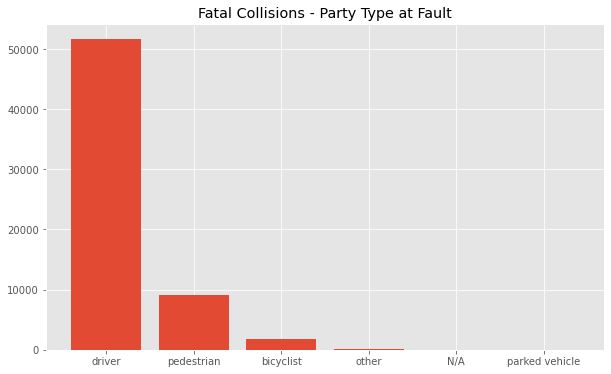

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(party_type_at_fault.index, height=party_type_at_fault.values)
ax.set_title("Fatal Collisions - Party Type at Fault")
plt.show()

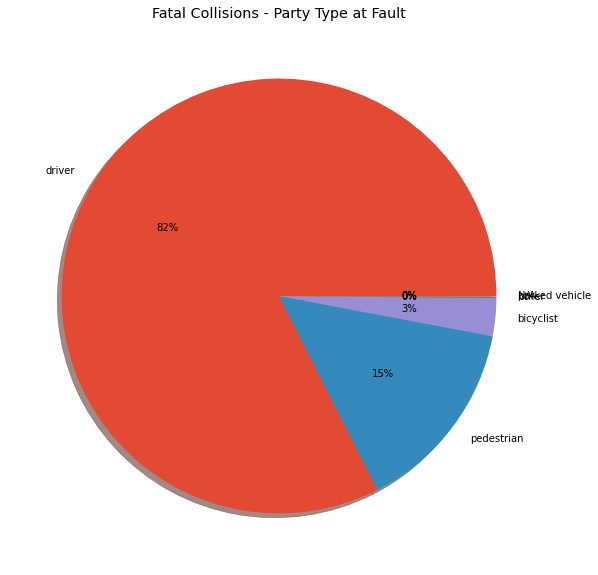

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(party_type_at_fault.values, labels=party_type_at_fault.index, autopct='%1.0f%%',
        shadow=True)
ax.set_title("Fatal Collisions - Party Type at Fault")
plt.show()

In [15]:
fatal_fault_collisions_selected['party_sex'].unique()

array(['male', 'female', None, 'X'], dtype=object)

In [16]:
fatal_fault_collisions_selected['party_sex'].fillna('N/A', inplace=True)

In [21]:
party_sex_at_fault = fatal_fault_collisions_selected['party_sex'].value_counts()

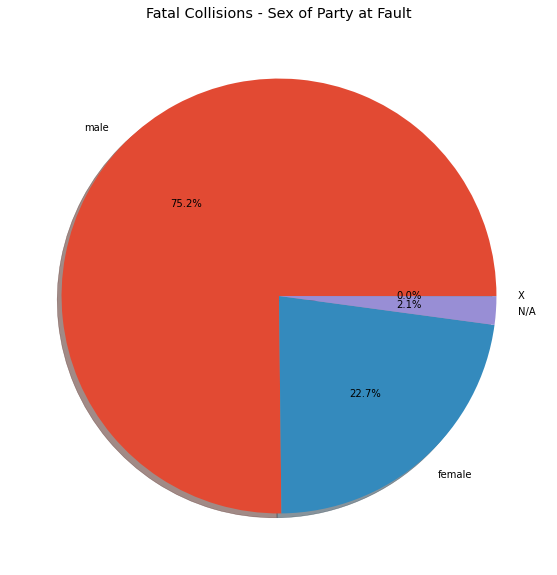

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(party_sex_at_fault.values, labels=party_sex_at_fault.index, autopct='%1.1f%%',
        shadow=True)
ax.set_title("Fatal Collisions - Sex of Party at Fault")
plt.show()

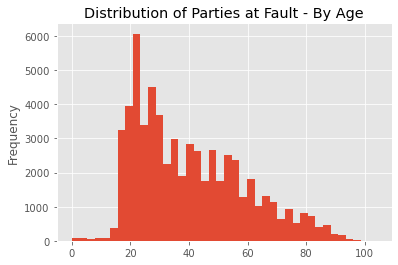

In [23]:
fatal_fault_collisions_selected['party_age'].plot(kind='hist', bins=40, title='Distribution of Parties at Fault - By Age');

In [24]:
fatal_fault_collisions_selected['party_sobriety'].unique()

array(['had been drinking, under influence', 'impairment unknown', None,
       'had not been drinking', 'had been drinking, not under influence',
       'had been drinking, impairment unknown', 'not applicable'],
      dtype=object)

In [25]:
fatal_fault_collisions_selected['party_sobriety'].fillna('N/A', inplace=True)

In [42]:
party_sobriety_at_fault = fatal_fault_collisions_selected['party_sobriety'].value_counts()
party_sobriety_at_fault

had not been drinking                     26871
had been drinking, under influence        16942
impairment unknown                        11356
N/A                                        3870
had been drinking, impairment unknown      2124
had been drinking, not under influence     1309
not applicable                              129
Name: party_sobriety, dtype: int64

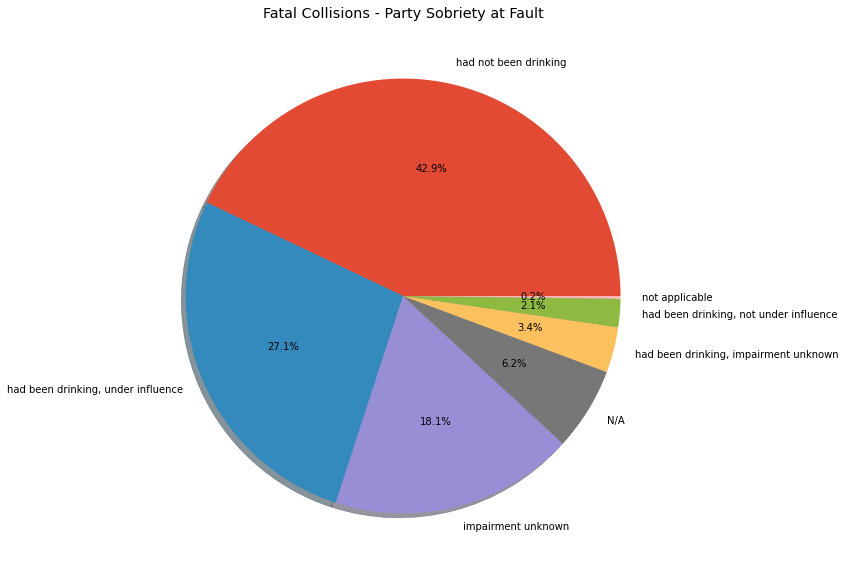

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(party_sobriety_at_fault.values, labels=party_sobriety_at_fault.index, autopct='%1.1f%%',
        shadow=True)
ax.set_title("Fatal Collisions - Party Sobriety at Fault")
plt.show()

In [29]:
fatal_fault_collisions['party_drug_physical'].fillna('N/A', inplace=True)

In [32]:
party_drug_physical_at_fault = fatal_fault_collisions['party_drug_physical'].value_counts()

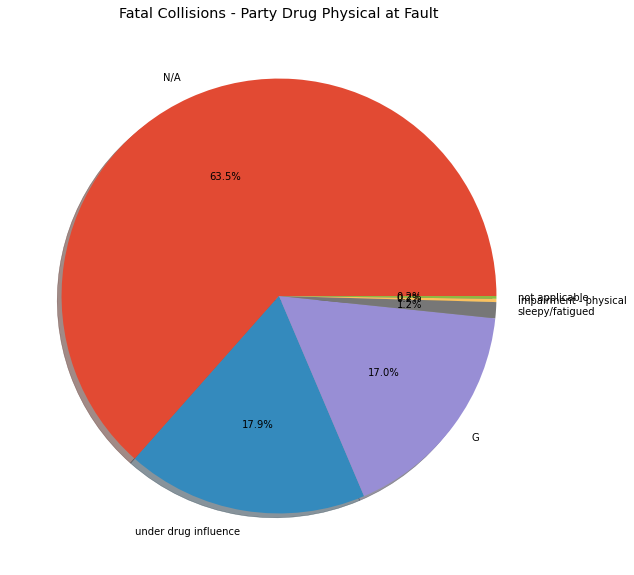

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(party_drug_physical_at_fault.values, labels=party_drug_physical_at_fault.index, autopct='%1.1f%%',
        shadow=True)
ax.set_title("Fatal Collisions - Party Drug Physical at Fault")
plt.show()

In [36]:
fatal_fault_collisions["collision_date"] = pd.to_datetime(fatal_fault_collisions["collision_date"])
day_type = np.array([1 if x.weekday() < 5 else 0 for x in fatal_fault_collisions['collision_date']])
fatal_fault_collisions['day_type'] = day_type

Text(0.5, 1.0, '% of Fatal Collision Count by Day Type Due To Alcohol Influence')

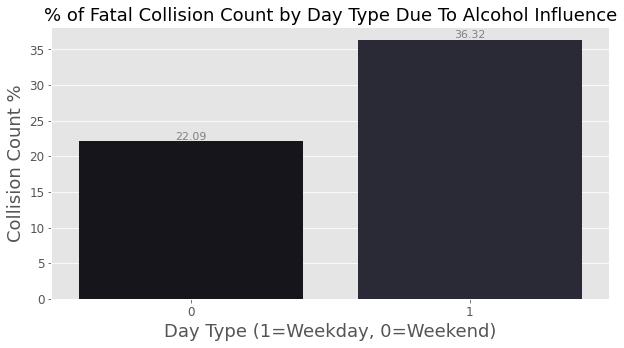

In [43]:
import seaborn as sns
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((fatal_fault_collisions.groupby('day_type')['party_sobriety'].apply(lambda x: x[x == 'had been drinking, under influence'].count()) /fatal_fault_collisions.groupby('day_type')['case_id'].count())*100).sort_values(), x=list(fatal_fault_collisions.groupby('day_type').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Day Type (1=Weekday, 0=Weekend)', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Fatal Collision Count by Day Type Due To Alcohol Influence", fontsize=18)

Text(0.5, 1.0, '% of Fatal Collision Count by Day Type Due To Drug Influence')

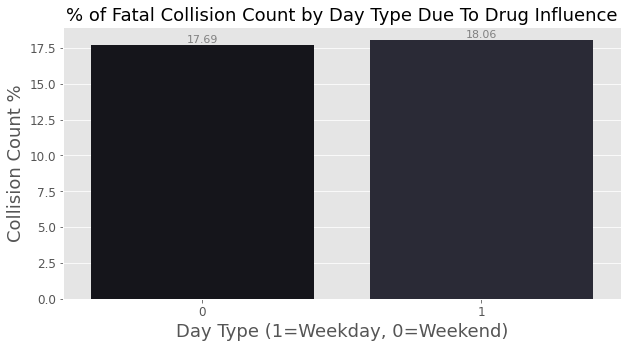

In [44]:
import seaborn as sns
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((fatal_fault_collisions.groupby('day_type')['party_drug_physical'].apply(lambda x: x[x == 'under drug influence'].count()) /fatal_fault_collisions.groupby('day_type')['case_id'].count())*100).sort_values(), x=list(fatal_fault_collisions.groupby('day_type').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Day Type (1=Weekday, 0=Weekend)', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Fatal Collision Count by Day Type Due To Drug Influence", fontsize=18)

In [45]:
fatal_fault_collisions["collision_time"] = pd.to_datetime(fatal_fault_collisions["collision_time"])
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
fatal_fault_collisions["time_of_day"] = pd.cut(fatal_fault_collisions["collision_time"].dt.hour, bins=b, labels=l, include_lowest=True)

Text(0.5, 1.0, '% of Fatal Collision Count by Time of Fay Due To Alcohol Influence')

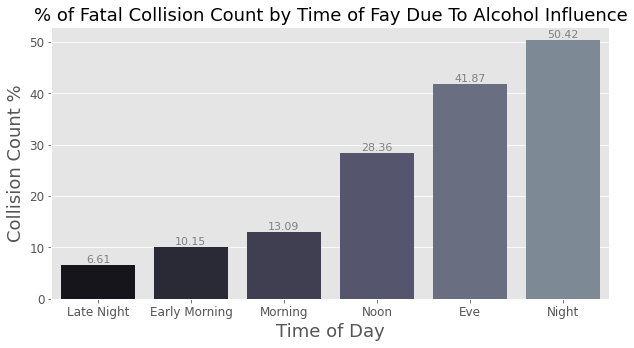

In [47]:
import seaborn as sns
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((fatal_fault_collisions.groupby('time_of_day')['party_sobriety'].apply(lambda x: x[x == 'had been drinking, under influence'].count()) /fatal_fault_collisions.groupby('time_of_day')['case_id'].count())*100).sort_values(), x=list(fatal_fault_collisions.groupby('time_of_day').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Time of Day', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Fatal Collision Count by Time of Fay Due To Alcohol Influence", fontsize=18)